In [1]:
import os
import glob
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score

In [42]:
def create_folder(temp_path):
    if os.path.isdir(temp_path):
        pass
    else:
        os.mkdir(temp_path)


def plot_confusion_matrix(cm, POD, FAR, POFD, TSS, 
                          save_path, datasets_info, file_name,
                          target_names=None, cmap=None, normalize=True, labels=True,
                          title='Confusion matrix', title_font_size=20,
                          label_font_size=13, graph_font_size=10.5, temp_f1_score=None):
    plt.rcParams.update({'font.size': graph_font_size})
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontdict={"fontsize": title_font_size})
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)

    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontdict={"fontsize": label_font_size})
    plt.xlabel('Predicted label\nPOD={:0.4f}; FAR={:0.4f}; TSS={:0.4f}; F1 Score={:.04f}'.format(
        POD, FAR, TSS, temp_f1_score), fontdict={"fontsize": label_font_size})
    try:
        print(f'{title}.png')
        plt.savefig(f'{save_path}{file_name}.png', bbox_inches='tight', dpi=300)
    except:
        create_folder(f'{save_path}')
        plt.savefig(f'{save_path}{file_name}.png', bbox_inches='tight', dpi=300)
    plt.show()


def change_value_(x):
    if x >= 3:
        return 1
    else:
        return 0




def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==0:
            TP += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==1:
            TN += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FN += 1

    return TP, FP, TN, FN


def process_each_def(temp_data_path, label_list, save_path, datasets_info, file_name):
    # 파일 경로 불러오기
    temp_data = glob.glob(temp_data_path)[0]

    # 파일 경로를 기준으로 데이터를 불러오기
    df = pd.read_csv(temp_data, index_col = 0)

    # 각 클래스별에 대한 이름 만들기(시정 기준으로 클래스를 나누었기 때문에 아래와 같이 직관적으로 범위를 볼 수 있게 해놈)
    label_list = label_list

    #
    temp_title = temp_data.split('/')[-1].split('.')[0]
    temp_title = temp_title.replace("_", " ").split('\\')[1]
    

    temp_cm = confusion_matrix(df.iloc[:,1], df.iloc[:,0])

    temp_df = df
    temp_df['Model'] = temp_df['Model'].apply(change_value_)
    temp_df['Target'] = temp_df['Target'].apply(change_value_)

    temp_f1_score = f1_score(temp_df.iloc[:,1], temp_df.iloc[:,0], pos_label=0)
    temp_cm_2 = confusion_matrix(temp_df.iloc[:,1], temp_df.iloc[:,0])
    TP, FP, TN, FN = perf_measure(temp_df.iloc[:,1], temp_df.iloc[:,0])

    POD = TP / (TP+FN)
    FAR = FP / (TP+FP)
    POFD = FP / (TN+TP)
    TSS = POD - POFD
    # print(POD, FAR, POFD, TSS)

    plot_confusion_matrix(temp_cm, POD, FAR, POFD, TSS, 
                          save_path, datasets_info, file_name, 
                          target_names = label_list, title = temp_title, 
                          title_font_size = 22, label_font_size = 15,
                          temp_f1_score = temp_f1_score)
    return None

565 lstm test result predict 1.png


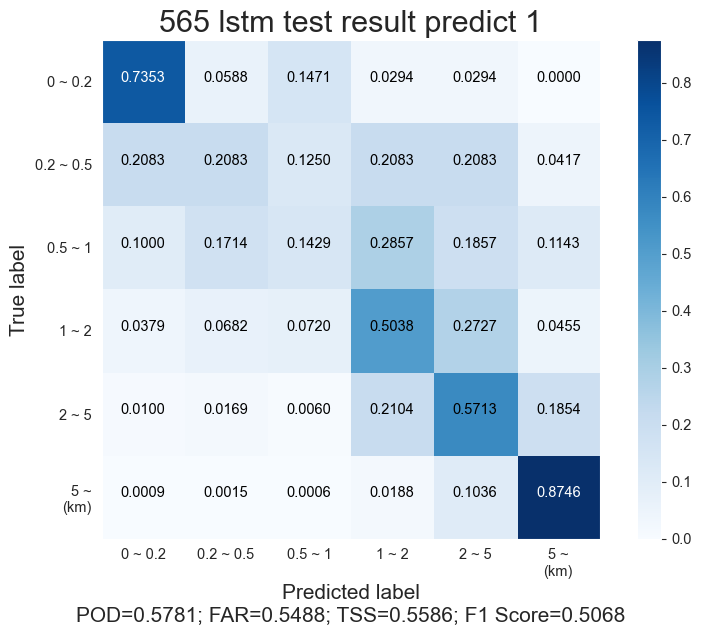

In [43]:
# 개별 시간대 및 데이터 유형별로 그래프 뽑기

data_type = "test"; predict_time = 1
temp_data_path = f"./datasets/test_1/*{data_type}*predict_{predict_time}*"
file_name = f"class_scatter_{data_type}_{predict_time}"

save_path = './result/'
datasets_info = "fix_1_30000_12"
label_list = ["0 ~ 0.2","0.2 ~ 0.5","0.5 ~ 1","1 ~ 2","2 ~ 5","5 ~\n(km)"]

process_each_def(temp_data_path, label_list, save_path, datasets_info, file_name)